# CE9010 Introduction To Data Analysis

## Group 3

Student Name  |  Matric No  
---|---
   |   
   |   
   |   

---

# Problem Statement

### TODO: Problem Statement (description of dataset and corresponding problem)

1. `inline code` - Point 1
2. `inline code` - Point 2
3. `inline code` - Point 3

> block quote

---

# Context

### TOD0: Add in description of variables in the dataset

**References:**
- [Reference 1](website)
- [Reference 2](website)
- [Reference 3](website)

---

# Table of Contents

1. [Setup](#1-|-Setup)
2. [Dataset Summaries](#2-|-Dataset-Summaries)
3. [Exploratory Data Analysis](#3-|-Exploratory-Data-Analysis)
4. [Data Pre-Preprocessing](#4-|-Data-Pre-Processing)
5. [Data Analysis](#5-|-Data-Analysis)
6. [Results Analysis](#6-|-Results-Analysis)

# 1 | Setup 

1. Ensure that the environment.yml file accompanying this notebook is located in the same directory as the notebook. <br><br>
2. Open Anaconda Prompt, and in Anaconda Prompt, navigate to the directory where the notebook was downloaded. <br>
3. In Anaconda Prompt, enter the following line of code:
> conda env create -f environment.yml

4. In Anaconda Prompt, enter the following line of code:
> conda info --envs

If installation of the environment is successful, you will see the environment 'CE9010_2021_Group3' listed in the list of environments.

5. Activate the notebook: 
> conda activate CE9010_2021_Group3

6. Run Jupyter Notebook 
> jupyter notebook

In [139]:
from google.colab import drive # import drive from google colab
 
ROOT = "/content/drive/"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
 
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive/
Mounted at /content/drive/


In [146]:
#Set github repo path
# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join 
# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = "/content/drive/MyDrive/rootCE9010/repo" 
 
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
 
# It's good to print out the value if you are not sure 
print("PROJECT_PATH: ", PROJECT_PATH)


PROJECT_PATH:  /content/drive/MyDrive/rootCE9010/repo


In [147]:
cd {PROJECT_PATH}


/content/drive/MyDrive/rootCE9010/repo


In [148]:
import os

print(os.getcwd())
os.listdir() 

/content/drive/MyDrive/rootCE9010/repo


['Project.ipynb',
 '.git',
 'README.md',
 'testnotebook.ipynb',
 '.gitignore',
 'CE9010 Project Presentation.pptx',
 'Ideas for Project.gdoc',
 'group3_notebook_CE9010_2021_v1.ipynb',
 'DataViz.ipynb',
 'Template.ipynb',
 'content',
 'environment.yml']

In [4]:
# Import required modules
try:
    import pandas as pd
    import plotly.express as px
    from matplotlib import pyplot as plt
    from IPython.display import IFrame,Image
    import seaborn as sns
    import numpy as np
except ImportError:
    print ("One or more modules not imported!")
    print ("Please check that all dependencies are installed.")

# Directory to store local content for loading of interactive images
if not os.path.exists("content"):
    os.mkdir("content")

# 2 | Dataset Summaries 

In [119]:
# Data Acquisition
# Import data from the Active Fire Dataset, VIIRS 375m / NOAA-20
data = pd.read_csv("https://firms2.modaps.eosdis.nasa.gov/data/active_fire/noaa-20-viirs-c2/csv/J1_VIIRS_C2_SouthEast_Asia_7d.csv",sep=',')
print (data.shape) # dimensions
data[:5]

(58262, 13)


latitude  longitude  bright_ti4  scan  ...  version bright_ti5  frp  daynight
0 -10.04099  149.90570       330.4  0.41  ...   2.0NRT      295.7  3.5         D
1  -9.61136  148.58527       332.3  0.46  ...   2.0NRT      283.1  3.4         D
2  -7.04995  146.57198       338.8  0.55  ...   2.0NRT      279.5  6.2         D
3  -6.89797  146.34767       331.8  0.56  ...   2.0NRT      290.2  4.1         D
4  -6.71671  147.33585       328.4  0.49  ...   2.0NRT      296.9  4.9         D

[5 rows x 13 columns]

In [120]:
# Check dataset
data.describe()

latitude     longitude  ...    bright_ti5           frp
count  58262.000000  58262.000000  ...  58262.000000  58262.000000
mean      19.730280    100.549454  ...    300.900134     14.401117
std        4.829137      7.228079  ...      9.357862     30.121630
min      -11.062080     88.003890  ...    249.400000      0.000000
25%       17.173955     95.411837  ...    295.200000      3.000000
50%       20.758965     99.142805  ...    301.400000      5.600000
75%       23.081183    104.465357  ...    305.800000     11.900000
max       30.984380    160.288860  ...    377.200000    536.300000

[8 rows x 9 columns]

In [121]:
# Check datatypes
data.dtypes

latitude      float64
longitude     float64
bright_ti4    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite       int64
confidence     object
version        object
bright_ti5    float64
frp           float64
daynight       object
dtype: object

In [122]:
# Check for null values (values contain no info and can be removed)
data.isnull().sum()

latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
confidence    0
version       0
bright_ti5    0
frp           0
daynight      0
dtype: int64

## Pre-visualization cleanup
Note that there are no null values --> Data is relatively clean. However, the datatypes of certain columns need to be corrected for appropriate data analysis.

In [123]:
# Concatenate acquisition date and time into a single column
data['period']=data['acq_date']+' '+data['acq_time'].astype(str) # this leaves a df with acq_date and acq_time still there
# data.drop(columns=['acq_date','acq_time'], inplace=True)
data['period']=pd.to_datetime(data['period'], format='%Y-%m-%d %H%M')
data['acq_date']=pd.to_datetime(data['period'].dt.date, format='%Y-%m-%d')
data['acq_time']=data['period'].dt.time
data.sort_values(by=['period'], inplace=True) # observe that without this code, time does not flow correctly in the animation
# data.set_index('period', inplace=True) # sets the index of the dataframe to be the period
data[:10]

latitude  longitude  bright_ti4  ...   frp  daynight              period
0  -10.04099  149.90570       330.4  ...   3.5         D 2021-04-01 03:24:00
30  -3.73083  143.32101       331.2  ...   3.8         D 2021-04-01 03:24:00
29  -3.86496  143.06902       343.6  ...  14.9         D 2021-04-01 03:24:00
28  -3.97043  143.80424       334.2  ...   2.1         D 2021-04-01 03:24:00
27  -4.09359  144.71913       344.1  ...   6.0         D 2021-04-01 03:24:00
26  -4.21646  144.90889       333.1  ...   2.9         D 2021-04-01 03:24:00
24  -4.34736  144.99658       341.2  ...   4.3         D 2021-04-01 03:24:00
23  -4.37743  144.99393       329.8  ...   2.9         D 2021-04-01 03:24:00
22  -4.48963  144.37625       338.8  ...  10.5         D 2021-04-01 03:24:00
21  -4.48902  144.38042       340.4  ...  12.9         D 2021-04-01 03:24:00

[10 rows x 14 columns]

# 3 | Exploratory Data Analysis

BUG: CELLS DO NOT WORK ON GITHUB; INTERACTIVE VISUALS <br>
Tested working in Jupyter and VSCode <br>
Github renders images statically and does not support interactive visuals

In [152]:
# Write animation to file
fig1 = px.scatter_geo(data, 
                    lat='latitude', 
                    lon='longitude', 
                    scope='asia',
                    center={'lat':2.2180,'lon':115.6628}, # centered to SEA
                    color='confidence',
                    animation_frame=data['period'].astype(str)) 
fig1.write_html('content/animation.html')
# TODO: Fix animation to have constant legend 

# Display animation
IFrame(src='content/animation.html', width=1080, height=720)

In [118]:
# FRP/confidence against time
sns.relplot(x="period", y="frp", hue="confidence", col="daynight", data=data, height=8)

ValueError: ignored

We note that there seems to be some data where the gaps between data is small. Hence, this necessitates the merging of time data into hourly frames to better analyze patterns. 

In [125]:
# Processing data further to clean visualization

# Generate new DFs with times rounded down to the nearest hour
date_sorted = data
date_sorted['period'] = date_sorted['period'].dt.floor('H')
date_sorted_gb = date_sorted.groupby('acq_date') # returns a groupby object which can be called with below code

# [date_sorted.get_group(x) for x in date_sorted_gb.groups] # this displays all the dataframes

date_sorted.head(10)

latitude  longitude  bright_ti4  ...   frp  daynight              period
0  -10.04099  149.90570       330.4  ...   3.5         D 2021-04-01 03:00:00
30  -3.73083  143.32101       331.2  ...   3.8         D 2021-04-01 03:00:00
29  -3.86496  143.06902       343.6  ...  14.9         D 2021-04-01 03:00:00
28  -3.97043  143.80424       334.2  ...   2.1         D 2021-04-01 03:00:00
27  -4.09359  144.71913       344.1  ...   6.0         D 2021-04-01 03:00:00
26  -4.21646  144.90889       333.1  ...   2.9         D 2021-04-01 03:00:00
24  -4.34736  144.99658       341.2  ...   4.3         D 2021-04-01 03:00:00
23  -4.37743  144.99393       329.8  ...   2.9         D 2021-04-01 03:00:00
22  -4.48963  144.37625       338.8  ...  10.5         D 2021-04-01 03:00:00
21  -4.48902  144.38042       340.4  ...  12.9         D 2021-04-01 03:00:00

[10 rows x 14 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

Success


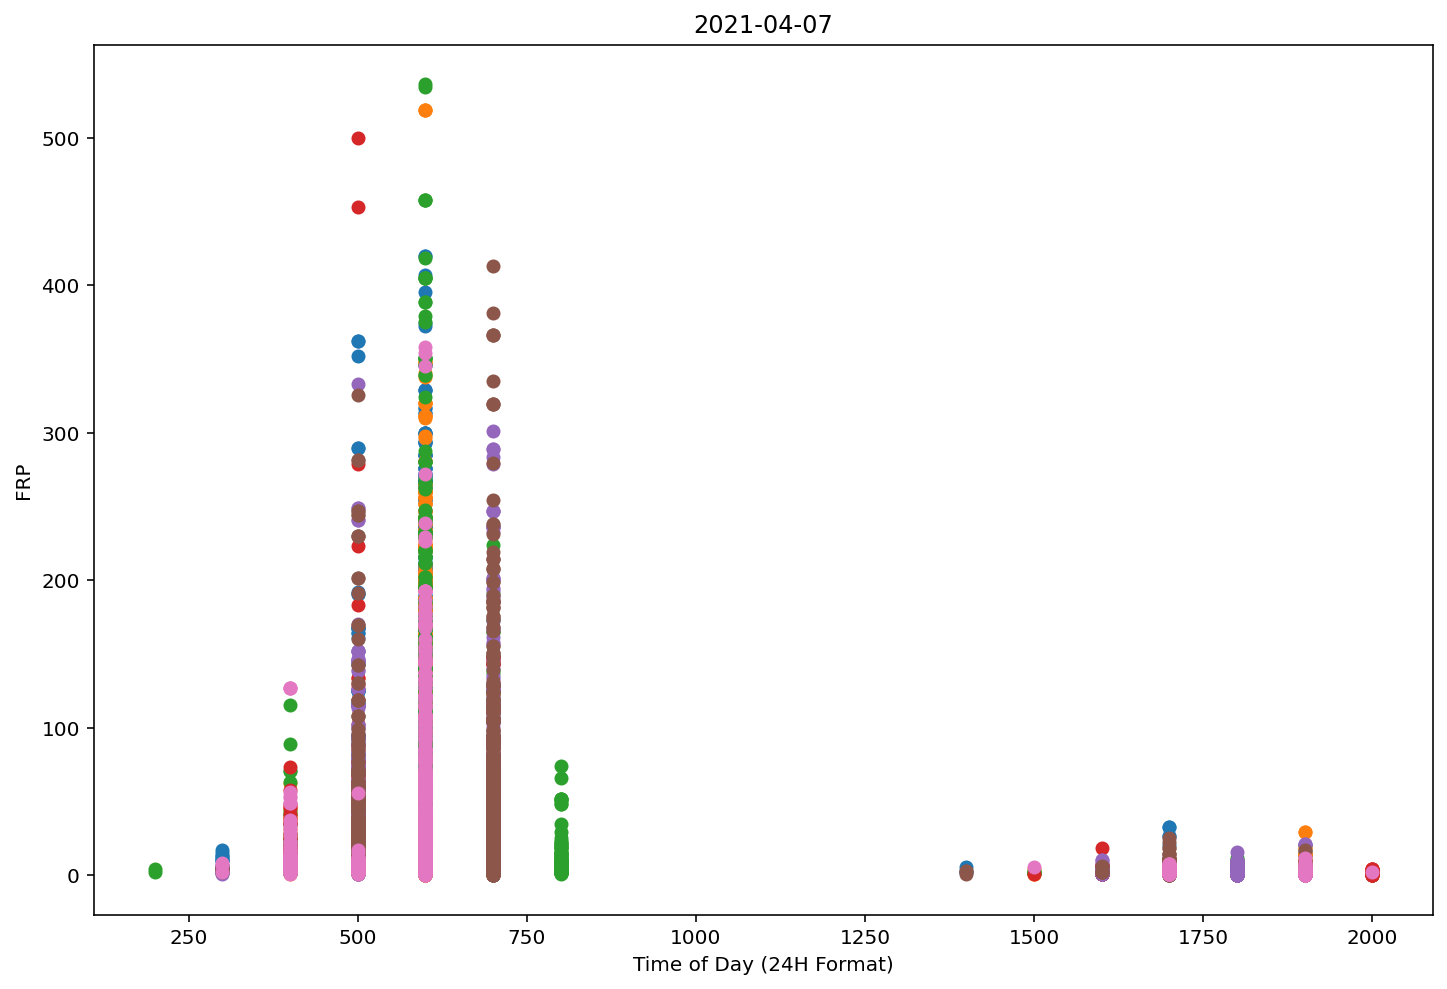

In [126]:
# Plot individual plots for every date
import numpy as np
# list_date = date_sorted['acq_date'].unique()
fig = plt.figure(figsize=(12,8))

for x in date_sorted_gb.groups:
    plt.title(str(x.date()))
    plt.xlabel('Time of Day (24H Format)')
    plt.ylabel('FRP')    
    current = date_sorted_gb.get_group(x)
    current['acq_time'] = current['period'].dt.time
    current['acq_time'] = current['acq_time'].apply(str) # convert to type string
    current['acq_time'] = current['acq_time'].str.replace(':','').astype(int)/100
    plt.scatter(current['acq_time'],current['frp'])
    plt.savefig('content/'+str(x.date())+'.png')

print ("Success")

In [127]:
import imageio

filenames = date_sorted['acq_date'].dt.date.unique().astype(str)
filenames = [(value+'.png') for value in filenames]

images = []
for filename in filenames:
    images.append(imageio.imread('content/'+filename))
imageio.mimsave('content/dailyfrp.gif', images, format='gif', duration = 5)

Image(url='content/dailyfrp.gif')  

In [15]:
# Write animation to file
fig2 = px.scatter_geo(date_sorted, 
                    lat='latitude', 
                    lon='longitude', 
                    scope='asia',
                    center={'lat':2.2180,'lon':115.6628}, # centered to SEA
                    color='confidence',
                    animation_frame=date_sorted['period'].astype(str)) 
fig2.write_html('content/animation2.html')
# TODO: Fix animation to have constant legend 

# Display animation
IFrame(src='content/animation2.html', width=1080, height=720)

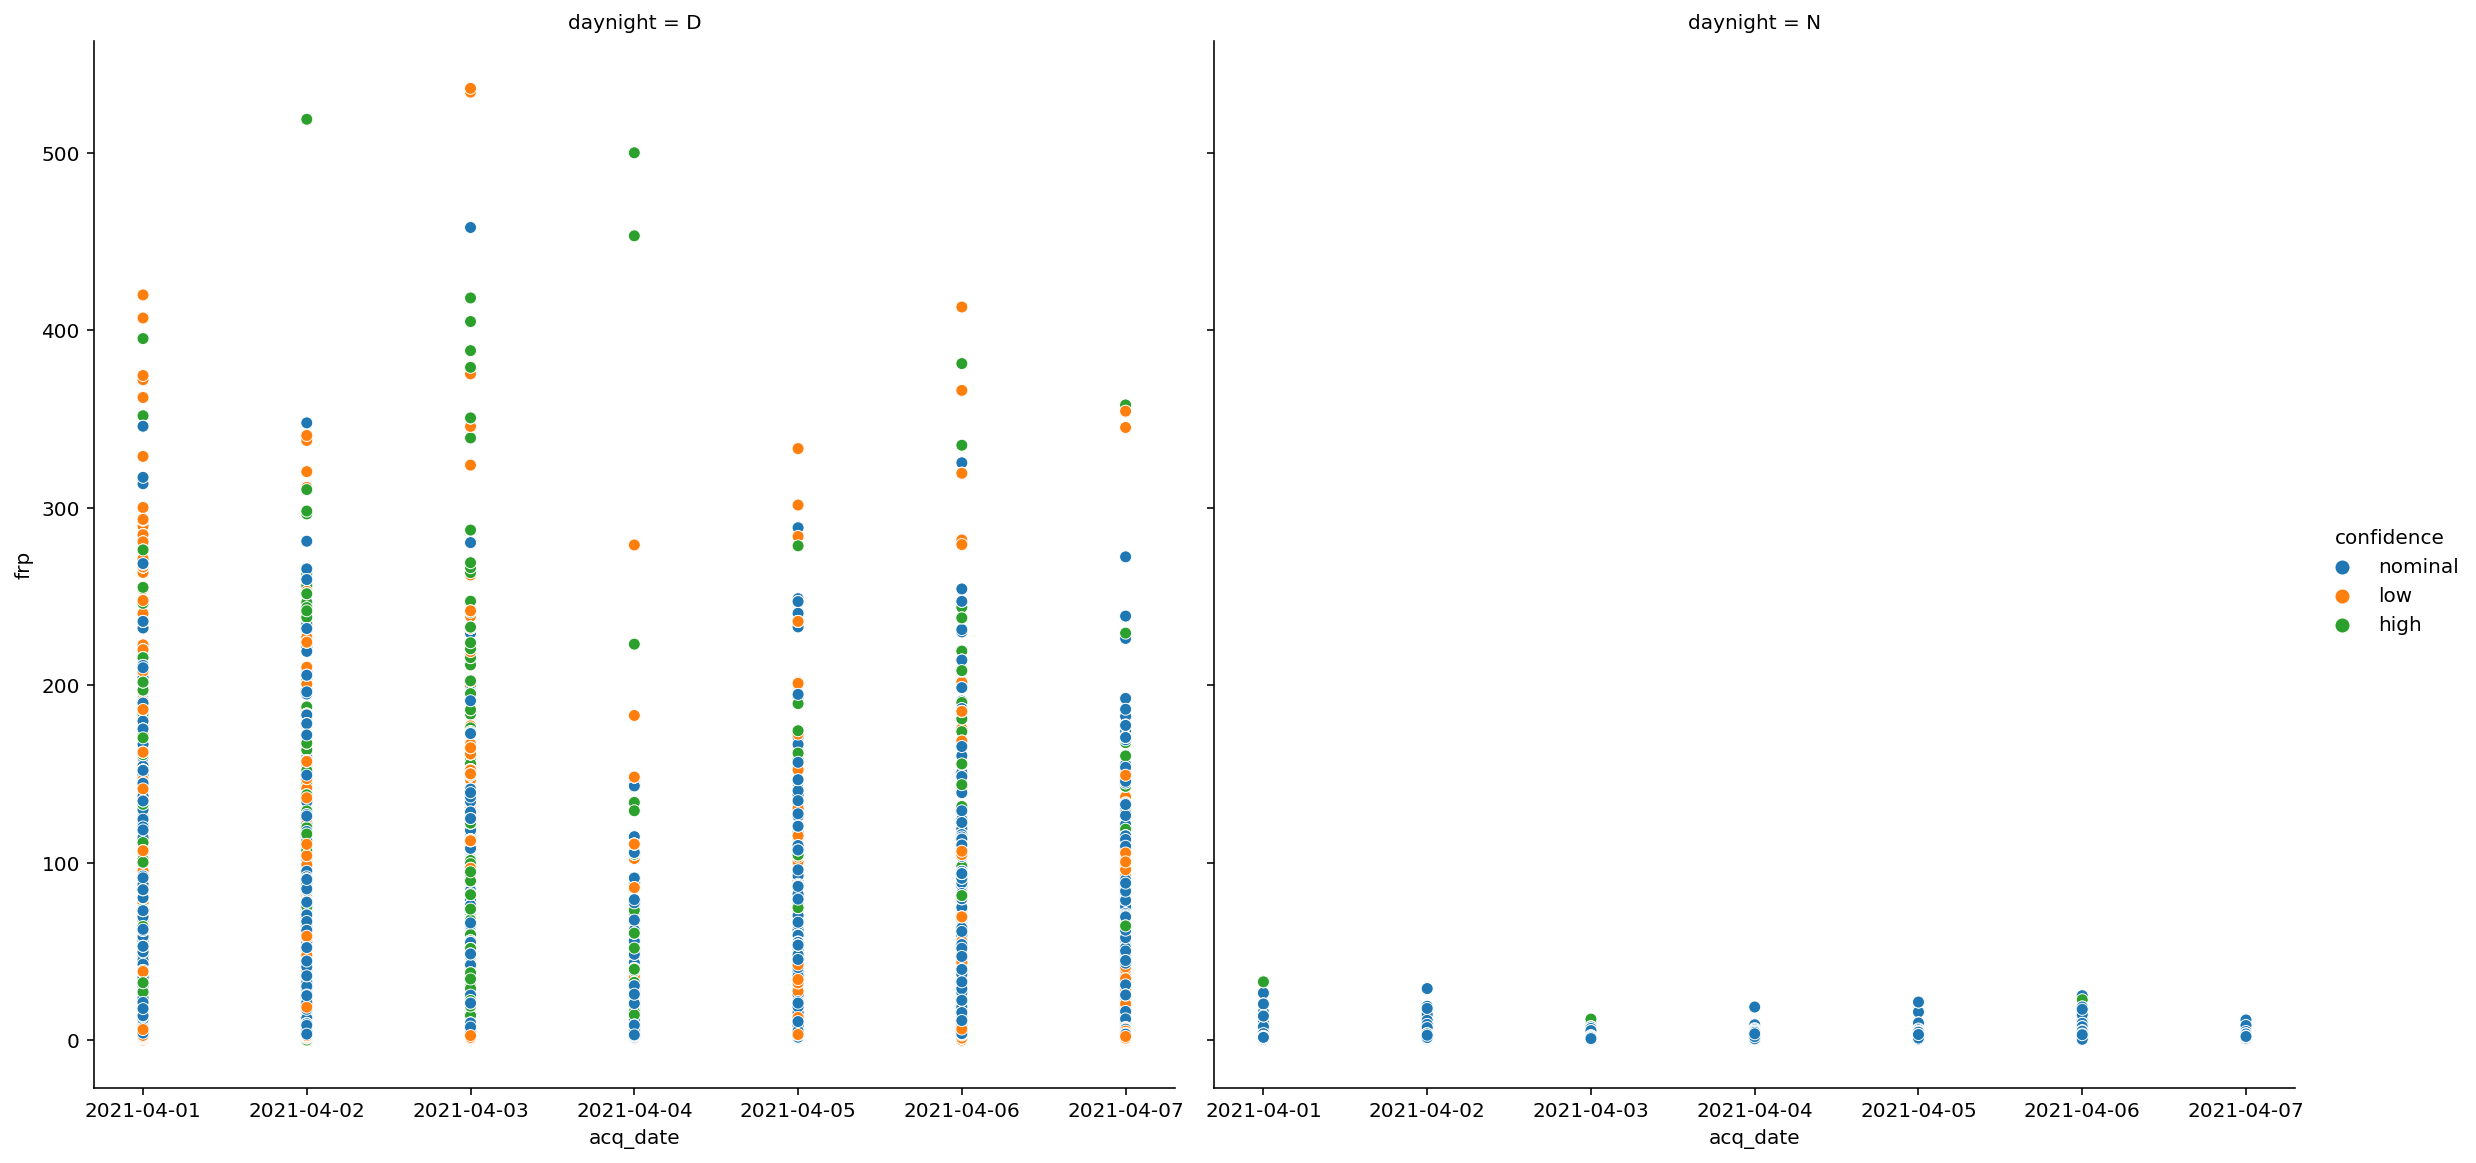

In [128]:
# FRP/confidence against time
sns.relplot(x="acq_date", y="frp", hue="confidence", col="daynight", data=date_sorted, height=8)

Looking at the above visualizations, we can see that: 
- there tends to be a concentration of fire data within the same region
- most fires are detected in the day
- there seems to be a pattern in when the fires are detected within the same 7 day period

Consequently, this necessitates cleaning of data to remove unnecessary information. Feature selection is necessary. 

# 4 | Data Pre-Processing

## 4.1 | Cleaning Dataset

In [17]:
# Convert 'object' columns into appropriate dtype
data['confidence'].astype('category')
data['daynight'].astype('category')

0        D
13       D
12       D
11       D
10       D
        ..
71828    N
71822    N
71637    N
71636    N
72205    N
Name: daynight, Length: 72206, dtype: category
Categories (2, object): ['D', 'N']

In [18]:
# Convert time into integers
data['acq_time'] = data['acq_time'].apply(str) # convert to type string
data['acq_time'] = data['acq_time'].str.replace(':','').astype(int)
data.head()

latitude  longitude  bright_ti4  ...   frp  daynight              period
0   -9.35641  150.53824       330.8  ...   3.4         D 2021-03-31 03:00:00
13  -4.09430  138.94487       325.1  ...   7.7         D 2021-03-31 03:00:00
12  -4.03426  143.09213       346.1  ...  10.5         D 2021-03-31 03:00:00
11  -6.28947  147.29047       343.2  ...   8.4         D 2021-03-31 03:00:00
10  -6.52758  147.79126       328.9  ...   1.5         D 2021-03-31 03:00:00

[5 rows x 14 columns]

In [19]:
# Resetting index for OHE preparation
data.set_index('period', inplace=True)
data.reset_index(inplace=True)
data.head()

period  latitude  longitude  ...  bright_ti5   frp  daynight
0 2021-03-31 03:00:00  -9.35641  150.53824  ...       292.8   3.4         D
1 2021-03-31 03:00:00  -4.09430  138.94487  ...       299.4   7.7         D
2 2021-03-31 03:00:00  -4.03426  143.09213  ...       295.5  10.5         D
3 2021-03-31 03:00:00  -6.28947  147.29047  ...       277.7   8.4         D
4 2021-03-31 03:00:00  -6.52758  147.79126  ...       287.1   1.5         D

[5 rows x 14 columns]

In [20]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

ohe_confidence = pd.DataFrame(enc.fit_transform(data[['confidence']]).toarray())
ohe_confidence.columns = enc.get_feature_names(['confidence'])
# ohe_confidence.head()

ohe_daynight = pd.DataFrame(enc.fit_transform(data[['daynight']]).toarray())
ohe_daynight.columns = enc.get_feature_names(['daynight'])
# ohe_daynight.head()

data = pd.concat([data, ohe_confidence, ohe_daynight], axis=1)
data.drop(['confidence', 'daynight'], axis=1, inplace=True)
data.head()

period  latitude  ...  daynight_D  daynight_N
0 2021-03-31 03:00:00  -9.35641  ...         1.0         0.0
1 2021-03-31 03:00:00  -4.09430  ...         1.0         0.0
2 2021-03-31 03:00:00  -4.03426  ...         1.0         0.0
3 2021-03-31 03:00:00  -6.28947  ...         1.0         0.0
4 2021-03-31 03:00:00  -6.52758  ...         1.0         0.0

[5 rows x 17 columns]

## 4.2 | Feature Selection

In [21]:
# Define X and y variables
y = data['frp']
X = data.drop(['frp','period','acq_date','version','satellite'],axis=1) 
X.dtypes

latitude              float64
longitude             float64
bright_ti4            float64
scan                  float64
track                 float64
acq_time                int64
bright_ti5            float64
confidence_high       float64
confidence_low        float64
confidence_nominal    float64
daynight_D            float64
daynight_N            float64
dtype: object

In [22]:
from sklearn.feature_selection import SelectKBest, f_regression, chi2

# Feature Selection (for analysis within dataset)
# Based on given score function, returns modified X dataset
def feature_selection(X,y,score_func_var,kvar='all'):
    # Fit data to model
    fs = SelectKBest(score_func=score_func_var, k=kvar)
    fs.fit_transform(X,y)

    # Generate new DataFrames with k selected variables
    feature_names = list(X.columns.values)

    mask = fs.get_support() #list of booleans
    new_features = [] # The list of your K best features

    for bool, feature in zip(mask, feature_names):
        if bool:
            new_features.append(feature)

    X_fs = pd.DataFrame(X, columns=new_features)

    # Print scores
    print ('Scores of variables')
    for i in range(len(fs.scores_)):
        print('Feature {:>2}, {:<50}:{:.10f}'.format(i, feature_names[i], fs.scores_[i]))

    # Plot the scores
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    plt.show()

    return (X_fs)

### TODO: REPHRASE PROPERLY
We have selected the frp values as the variable we are trying to analyze, and hence it shall be removed from the X dataset. The columns 'period' and 'acq_date' logically are insufficient to hold enough data as the dataset spans only 7 days and is hence too small a quantity of variables (can't remember the right term) to provide accurate information. However, the acq_time column contains 7 days x 24h worth of data, and hence may contain sufficient data to influence the result. 

Scores of variables
Feature  0, latitude                                          :66.4441483605
Feature  1, longitude                                         :48.9635684040
Feature  2, bright_ti4                                        :5640.8899580957
Feature  3, scan                                              :865.9984261329
Feature  4, track                                             :602.1650906890
Feature  5, acq_time                                          :2479.1404950020
Feature  6, bright_ti5                                        :12035.1752531505
Feature  7, confidence_high                                   :3412.7753827802
Feature  8, confidence_low                                    :442.8197065269
Feature  9, confidence_nominal                                :3011.2970652695
Feature 10, daynight_D                                        :2543.3306595677
Feature 11, daynight_N                                        :2543.3306595677


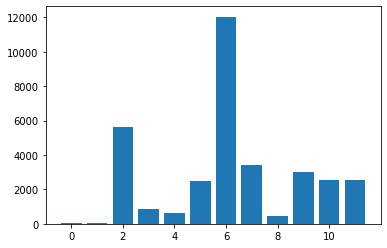

In [23]:
X_fs = feature_selection(X,y,f_regression)

## Data Normalization

In [129]:
type(X_fs)
X_fs.shape

(72206, 12)

In [130]:
import pandas as pd
from sklearn import preprocessing
def normalizeto01(df):
  x = df.values #returns a numpy array
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  return pd.DataFrame(x_scaled)

X_fs_normalized = normalizeto01(X_fs)
print(X_fs_normalized[:5])
print(X_fs)




         0         1         2         3         4   ...   7    8    9    10   11
0  0.040566  0.865109  0.772470  0.354167  0.095238  ...  0.0  0.0  1.0  1.0  0.0
1  0.165716  0.704724  0.736644  0.395833  0.309524  ...  0.0  1.0  0.0  1.0  0.0
2  0.167144  0.762098  0.868636  0.250000  0.047619  ...  0.0  0.0  1.0  1.0  0.0
3  0.113508  0.820179  0.850409  0.145833  0.023810  ...  0.0  0.0  1.0  1.0  0.0
4  0.107845  0.827107  0.760528  0.166667  0.023810  ...  0.0  0.0  1.0  1.0  0.0

[5 rows x 12 columns]
       latitude  longitude  ...  daynight_D  daynight_N
0     -6.270876   7.171643  ...    0.428065   -0.428065
1     -5.133569   5.503472  ...    0.428065   -0.428065
2     -5.120592   6.100222  ...    0.428065   -0.428065
3     -5.608014   6.704321  ...    0.428065   -0.428065
4     -5.659477   6.776380  ...    0.428065   -0.428065
...         ...        ...  ...         ...         ...
72201  0.385317  -0.630816  ...   -2.336095    2.336095
72202  0.415111  -0.642001  ...   -2.

In [33]:
##z-scoring standardization

from sklearn.preprocessing import StandardScaler
def standardize(df):
  # create a scaler object
  std_scaler = StandardScaler()
  std_scaler
  # fit and transform the data
  return pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns)

X_fs_standardized  = standardize(X_fs)
print(X_fs_standardized)

       latitude  longitude  ...  daynight_D  daynight_N
0     -6.270876   7.171643  ...    0.428065   -0.428065
1     -5.133569   5.503472  ...    0.428065   -0.428065
2     -5.120592   6.100222  ...    0.428065   -0.428065
3     -5.608014   6.704321  ...    0.428065   -0.428065
4     -5.659477   6.776380  ...    0.428065   -0.428065
...         ...        ...  ...         ...         ...
72201  0.385317  -0.630816  ...   -2.336095    2.336095
72202  0.415111  -0.642001  ...   -2.336095    2.336095
72203 -5.056259   0.440936  ...   -2.336095    2.336095
72204 -5.055961   0.440788  ...   -2.336095    2.336095
72205  2.067344  -1.776611  ...   -2.336095    2.336095

[72206 rows x 12 columns]


##Linear Regression

In [131]:
X_bestf = data[['bright_ti4', 'bright_ti5']]
y = data[['frp']]

print(X_bestf)
print (y)

       bright_ti4  bright_ti5
0           330.4       295.7
30          331.2       287.0
29          343.6       290.5
28          334.2       287.7
27          344.1       292.4
...           ...         ...
57884       310.0       294.9
57878       308.5       295.5
57693       297.8       272.4
57692       295.8       272.9
58261       297.4       273.7

[58262 rows x 2 columns]
        frp
0       3.5
30      3.8
29     14.9
28      2.1
27      6.0
...     ...
57884   3.4
57878   1.7
57693   2.0
57692   2.2
58261   2.0

[58262 rows x 1 columns]


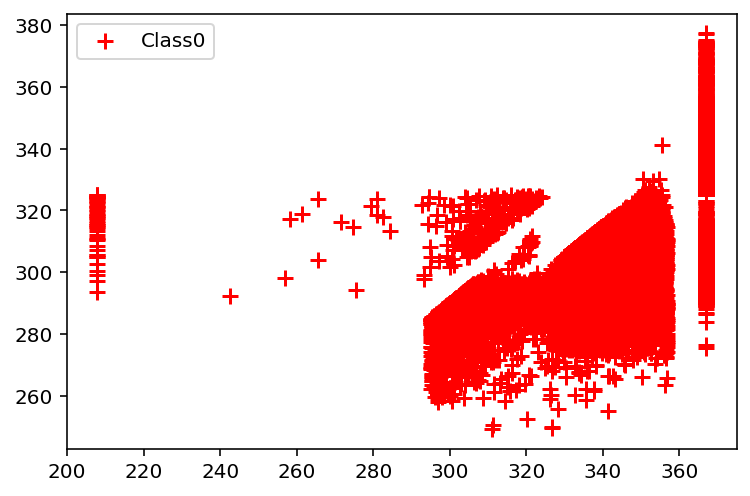

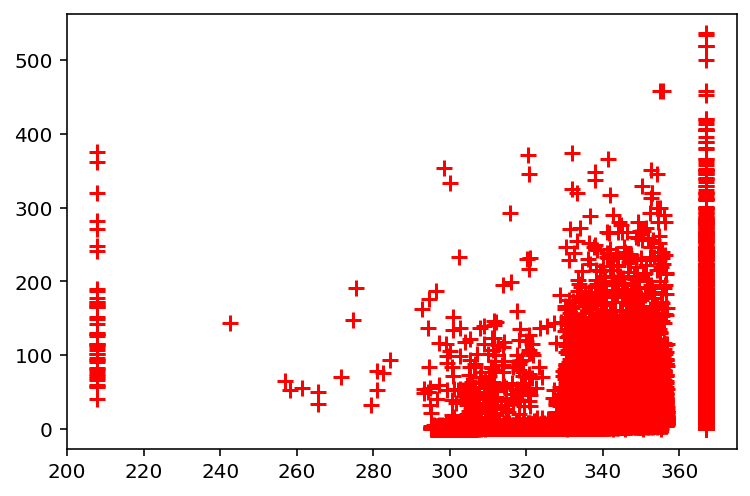

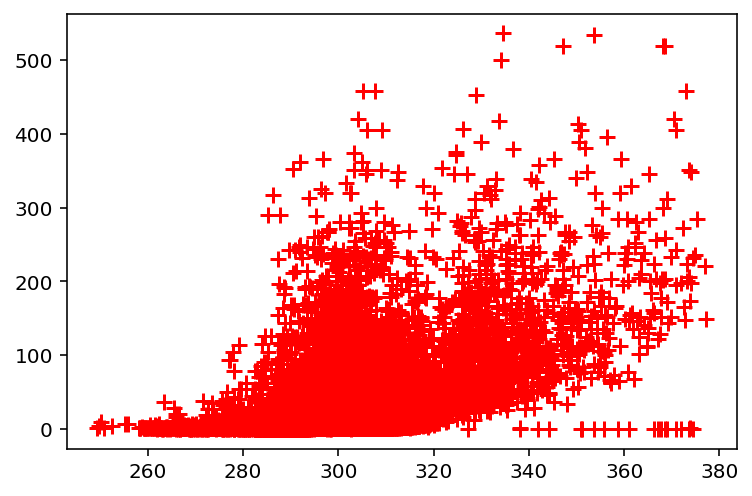

In [134]:
plt.scatter(X_bestf.iloc[:, 0], X_bestf.iloc[:, 1], s=60, c='r', marker='+', label='Class0') 
#plt.scatter(X_bestf.iloc[:, 0], y, s=60, c='r', marker='+', label='Class1') 
#plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Class1')
#plt.title(title)
plt.legend()
plt.show()
plt.clf()

plt.scatter(X_bestf.iloc[:, 0], y, s=60, c='r', marker='+', label='Class1') 
plt.show()
plt.clf()
plt.scatter(X_bestf.iloc[:, 1], y, s=60, c='r', marker='+', label='Class1') 
plt.show()


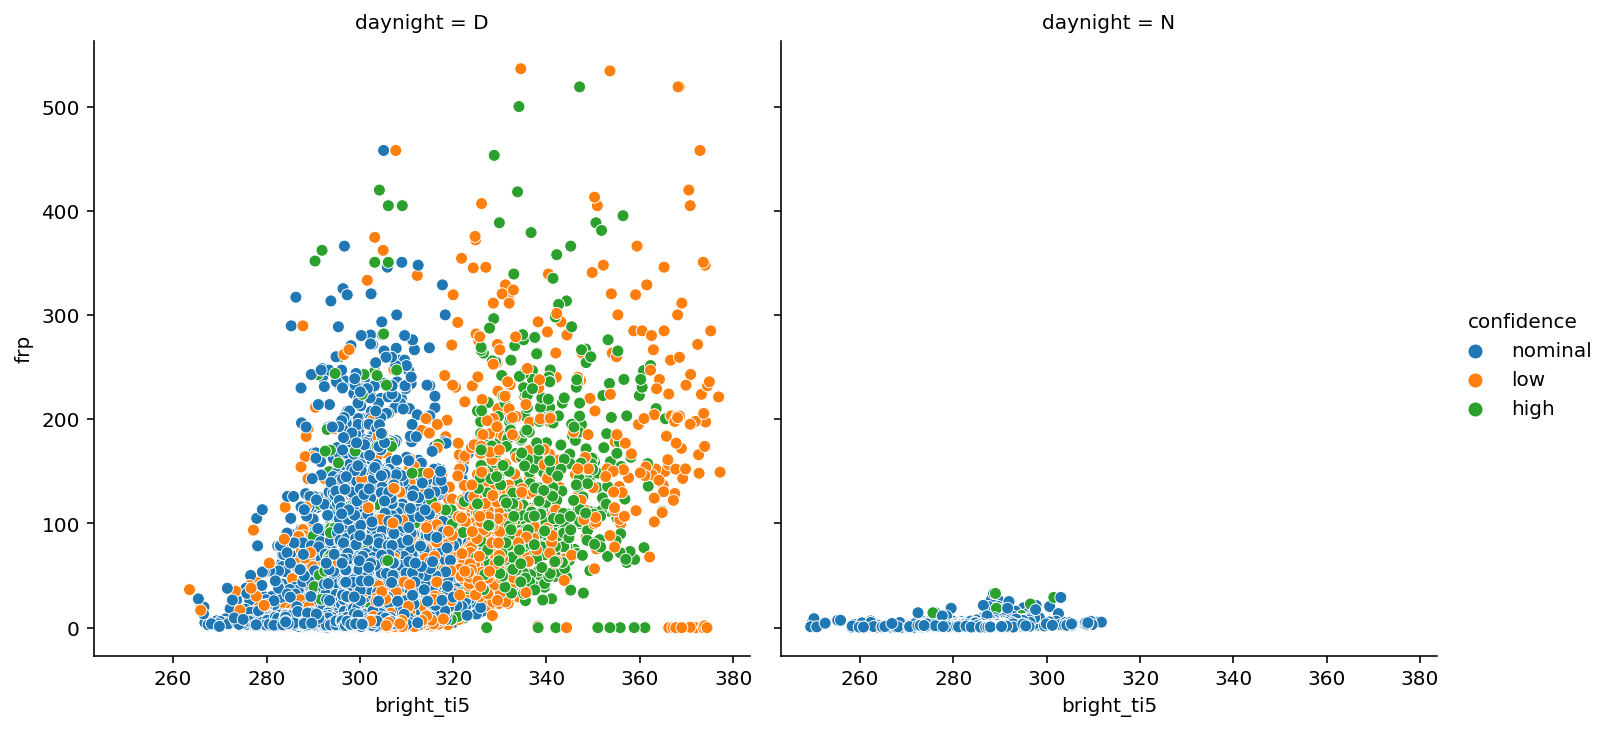

In [132]:
sns.relplot(x="bright_ti5", y="frp", hue="confidence", col = "daynight",data=date_sorted, kind='scatter')

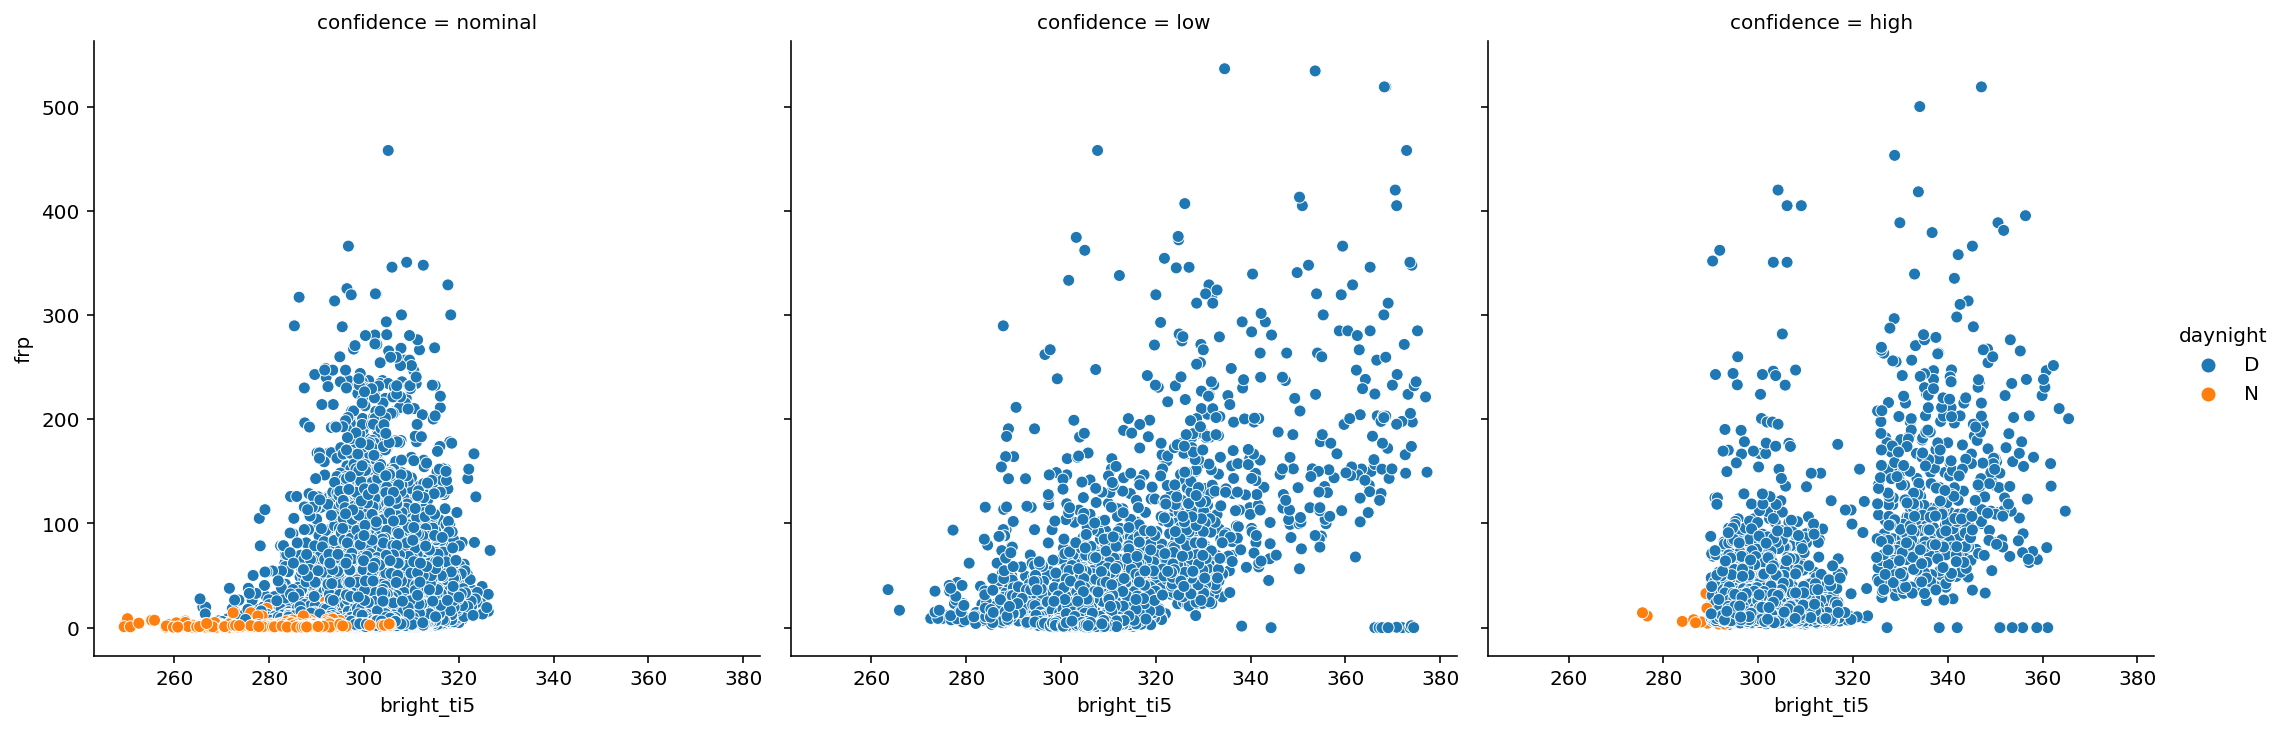

In [133]:
sns.relplot(x="bright_ti5", y="frp", hue="daynight", col = "confidence",data=date_sorted, kind='scatter')

In [135]:
from sklearn.model_selection import train_test_split
x_train_both, x_test_both, y_train, y_test = train_test_split(X_bestf, y, test_size=0.2, random_state=0)

In [136]:
x_train = x_train_both.iloc[:,0].values

Time= 0.003134012222290039
[[-154.96428599]
 [   0.50509994]]
(57764, 2)
loss sklearn= [[901.78781159]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



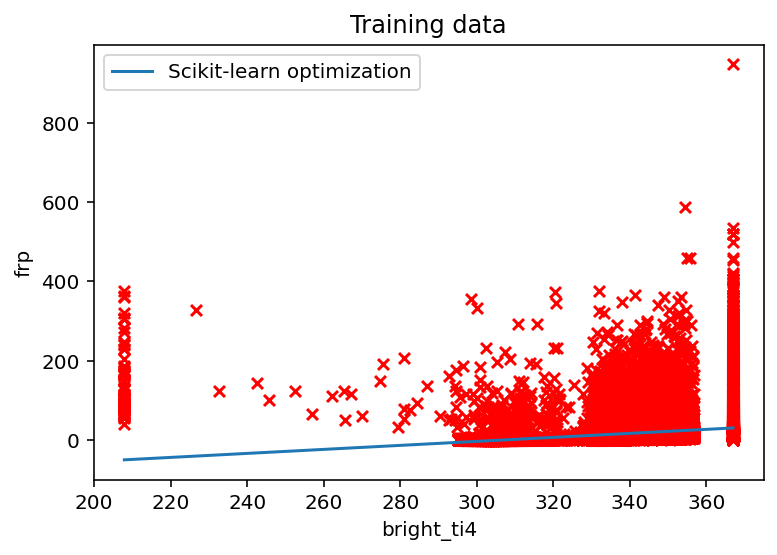

In [91]:
# machine learning library
from sklearn.linear_model import LinearRegression
# run linear regression with scikit-learn
start = time.time()
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(x_train[:,None], y_train) # learn the model parameters #YOUR CODE HERE
print('Time=',time.time() - start)


# compute loss value
w_sklearn = np.zeros([2,1])
w_sklearn[0,0] = lin_reg_sklearn.intercept_
w_sklearn[1,0] = lin_reg_sklearn.coef_
print(w_sklearn)

##
d = 1
poly = PolynomialFeatures(d)
train_X = poly.fit_transform(x_train.reshape(-1, 1))
print(train_X.shape)

loss_sklearn = loss_mse(f_pred(train_X,w_sklearn),y_train[:,None])
print('loss sklearn=',loss_sklearn)

x_pred = np.linspace(min(x_train),max(x_train),100)
# plot
y_pred_sklearn = w_sklearn[0] + w_sklearn[1]* x_pred
plt.figure(3)
plt.scatter(x_train, y_train, s=30, c='r', marker='x', linewidths=1)
plt.plot(x_pred, y_pred_sklearn,label='Scikit-learn optimization'.format(i=2))
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('bright_ti4')
plt.ylabel('frp')
plt.show()

In [92]:
y_pred_test = lin_reg_sklearn.predict(x_test_both.iloc[:,0].values.reshape(-1,1))


from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))


df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df

Mean Absolute Error: 13.920368564565806
Mean Squared Error: 838.0088990517609
Root Mean Squared Error: 28.94838335817323


Actual  Predicted
61486     1.8  11.163085
65582     1.8  10.354925
58396     5.0  20.557944
54304     2.7  13.031954
68500    12.2  18.284994
...       ...        ...
64323     5.2  12.728895
36742     3.5  18.689074
32291    15.1  18.032444
53016     1.8  11.971245
13176     0.8  -1.312884

[14442 rows x 2 columns]

In [97]:
x_train = x_train_both.iloc[:,1].values

Time= 0.004366159439086914
[[-376.52964634]
 [   1.30374961]]
(57764, 2)
loss sklearn= [[830.13258015]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



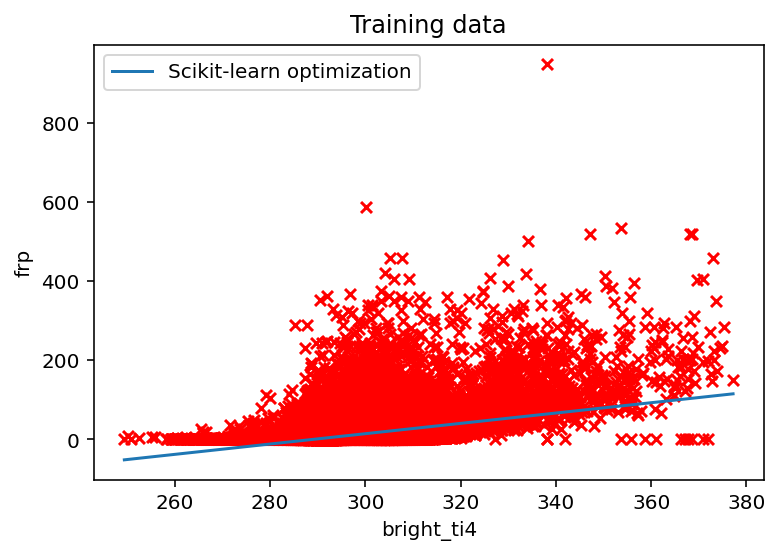

In [98]:
# machine learning library
from sklearn.linear_model import LinearRegression
# run linear regression with scikit-learn
start = time.time()
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(x_train[:,None], y_train) # learn the model parameters #YOUR CODE HERE
print('Time=',time.time() - start)


# compute loss value
w_sklearn = np.zeros([2,1])
w_sklearn[0,0] = lin_reg_sklearn.intercept_
w_sklearn[1,0] = lin_reg_sklearn.coef_
print(w_sklearn)

##
d = 1
poly = PolynomialFeatures(d)
train_X = poly.fit_transform(x_train.reshape(-1, 1))
print(train_X.shape)

loss_sklearn = loss_mse(f_pred(train_X,w_sklearn),y_train[:,None])
print('loss sklearn=',loss_sklearn)

x_pred = np.linspace(min(x_train),max(x_train),100)
# plot
y_pred_sklearn = w_sklearn[0] + w_sklearn[1]* x_pred
plt.figure(3)
plt.scatter(x_train, y_train, s=30, c='r', marker='x', linewidths=1)
plt.plot(x_pred, y_pred_sklearn,label='Scikit-learn optimization'.format(i=2))
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('bright_ti4')
plt.ylabel('frp')
plt.show()

In [99]:
y_pred_test = lin_reg_sklearn.predict(x_test_both.iloc[:,1].values.reshape(-1,1))


from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))


df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df

Mean Absolute Error: 14.998506690588792
Mean Squared Error: 787.2764930134291
Root Mean Squared Error: 28.058447801213614


Actual  Predicted
61486     1.8  11.726986
65582     1.8   5.860113
58396     5.0  22.417733
54304     2.7  11.335861
68500    12.2  17.463485
...       ...        ...
64323     5.2   4.947488
36742     3.5  30.109856
32291    15.1  23.330358
53016     1.8  13.161111
13176     0.8   4.556363

[14442 rows x 2 columns]

In [38]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# scikit-learn library
from sklearn.preprocessing import PolynomialFeatures

# scientific computing library
from scipy.optimize import minimize

# remove warning
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

# computational time
import time

In [ ]:
# Definitions of all functions

# sigmoid function
def sigmoid(z):
    sigmoid_f = 1 / (1 + np.exp(-z)) 
    return sigmoid_f 


# predictive function definition
def f_pred(X,w): 
    f = X.dot(w) #YOUR CODE HERE
    return f 

# loss function definition
def loss_logreg(w,X,y,reg): 
    n = len(y)
    y_pred = sigmoid(X.dot(w)) 
    loss = -1/n* ( y.T.dot(np.log(y_pred+1e-10)) + (1-y).T.dot(np.log(1-y_pred+1e-10)) ) 
    d = w.shape[0]
    loss += reg/d * w.T.dot(w)
    return loss


# loss function definition
def loss_mse(y_pred,y): 
    n = len(y)
    loss = 1/n* (y_pred - y).T.dot(y_pred - y) #YOUR CODE HERE
    return loss

# loss function definition
def loss_mse_para(w,X,y,reg): 
    n = len(y)
    y_pred = f_pred(X,w)
    loss = loss_mse(y_pred,y)
    
    d = w.shape[0]
    loss += reg/d * w.T.dot(w) 
    return loss


def plot_classes(data,title,cpt_fig):
    
    # plot
    x1 = data[:,0] # feature 1
    x2 = data[:,1] # feature 2
    idx_class0 = (data[:,2]==0) # index of class0
    idx_class1 = (data[:,2]==1) # index of class1

    plt.figure(cpt_fig,figsize=(6,6))
    plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Class0') 
    plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Class1')
    plt.title(title)
    plt.legend()
    plt.show()
    
    
def compute_w_solution(X,y,reg):
    initial_w = np.zeros((X.shape[1],1))
    result = minimize(loss_mse_para, initial_w, args=(X,y,reg), method='Powell', options={'maxiter':500})
    w_solution = np.array(result.x)[:,None]
    loss_solution = loss_mse_para(w_solution,X,y,reg)
    return w_solution, loss_solution
    

def plot_reg_line(X,w,data,title,cpt_fig):
  
    
def plot_decision_boundary(X,w,data,title,cpt_fig):

    # compute values p(x) for multiple data points x
    x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
    x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid

    n_mesh = xx1.reshape(-1).shape[0]
    mesh_data = np.zeros((n_mesh,2))
    mesh_data[:,0] = xx1.reshape(-1)
    mesh_data[:,1] = xx2.reshape(-1)
    mesh_X = poly.fit_transform(mesh_data)

    p = f_pred(mesh_X,w)
    p = p.reshape(xx1.shape)

    # plot
    x1 = data[:,0] # feature 1
    x2 = data[:,1] # feature 2
    idx_class0 = (data[:,2]==0) # index of class0
    idx_class1 = (data[:,2]==1) # index of class1
    plt.figure(cpt_fig,figsize=(6,6))
    plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Class0') 
    plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Class1')
    plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='k') 
    plt.legend()
    plt.title(title)
    plt.show()
    
    
# error
def compute_error(X,w,y):
    
    # continuous predictive function of the classes
    pred = f_pred(X,w)
    
    # discrete predictive function of the classes
    y_pred = (pred >= 0.5).astype('int').squeeze()

    # accuracy
    y = y.squeeze()
    diff = (y_pred == y).astype('int')
    accuracy = 100* sum(diff)/ y.shape[0]
    
    return 100-accuracy
    

In [ ]:
# Write animation to file
fig1 = px.scatter_geo(data, 
                    lat='latitude', 
                    lon='longitude', 
                    scope='asia',
                    center={'lat':2.2180,'lon':115.6628}, # centered to SEA
                    color='frp',
                    animation_frame=data['acq_date'].astype(str)) 
fig1.write_html('content/animation3.html')
# TODO: Fix animation to have constant legend 

# Display animation
#IFrame(src='content/animation3.html', width=1080, height=720)

0         3.5
30        3.8
29       14.9
28        2.1
27        6.0
         ... 
57884     3.4
57878     1.7
57693     2.0
57692     2.2
58261     2.0
Name: frp, Length: 58262, dtype: float64


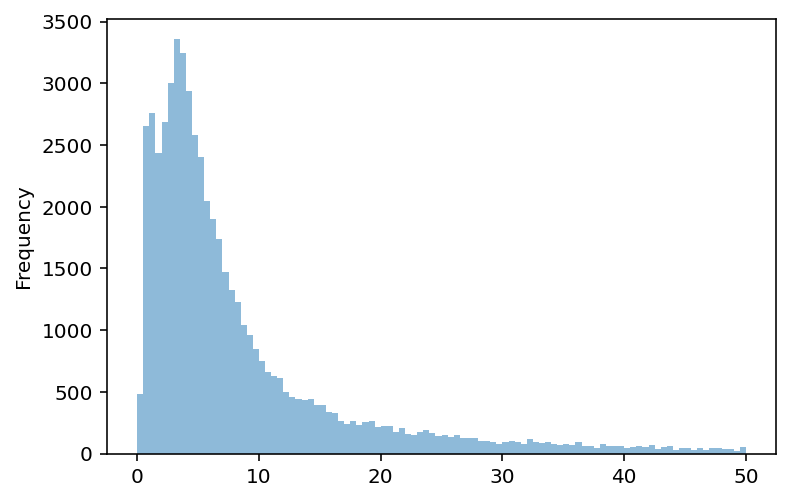

In [172]:
df = data['frp']
print(df)
ax = df.plot.hist(bins=100, alpha=0.5, range=[0, 50] )

     latitude  longitude  bright_ti4  ...    frp  daynight              period
705  17.80085  105.41946       367.0  ...  124.6         D 2021-04-01 05:00:00
706  17.79896  105.41138       349.8  ...  125.6         D 2021-04-01 05:00:00
707  17.80761  105.41661       367.0  ...  124.6         D 2021-04-01 05:00:00
709  17.80939  105.42419       353.2  ...  124.6         D 2021-04-01 05:00:00
710  17.80603  105.40986       337.6  ...  125.6         D 2021-04-01 05:00:00

[5 rows x 14 columns] (1389, 14)
705      124.6
706      125.6
707      124.6
709      124.6
710      125.6
         ...  
55666    113.0
55611    149.2
55647    109.2
55868    105.4
55837    100.4
Name: frp, Length: 1389, dtype: float64


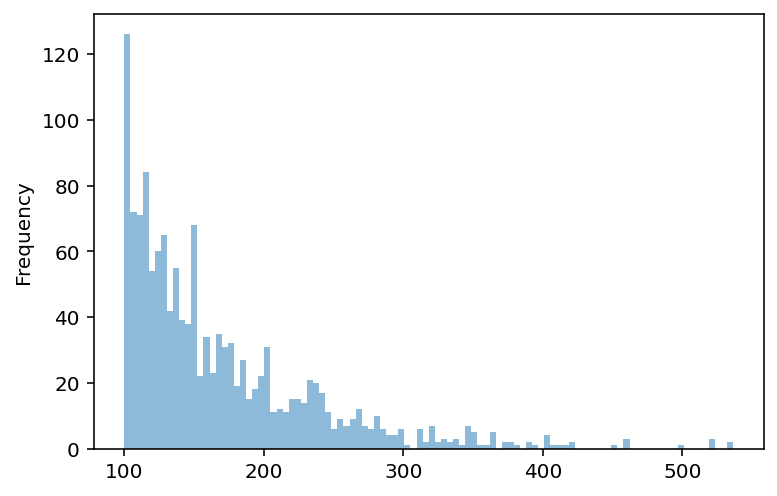

In [178]:
df3 = data[data.frp > 100]
print(df3[:5], df3.shape)


df = df3['frp']
print(df)
ax = df.plot.hist(bins=100, alpha=0.5 )

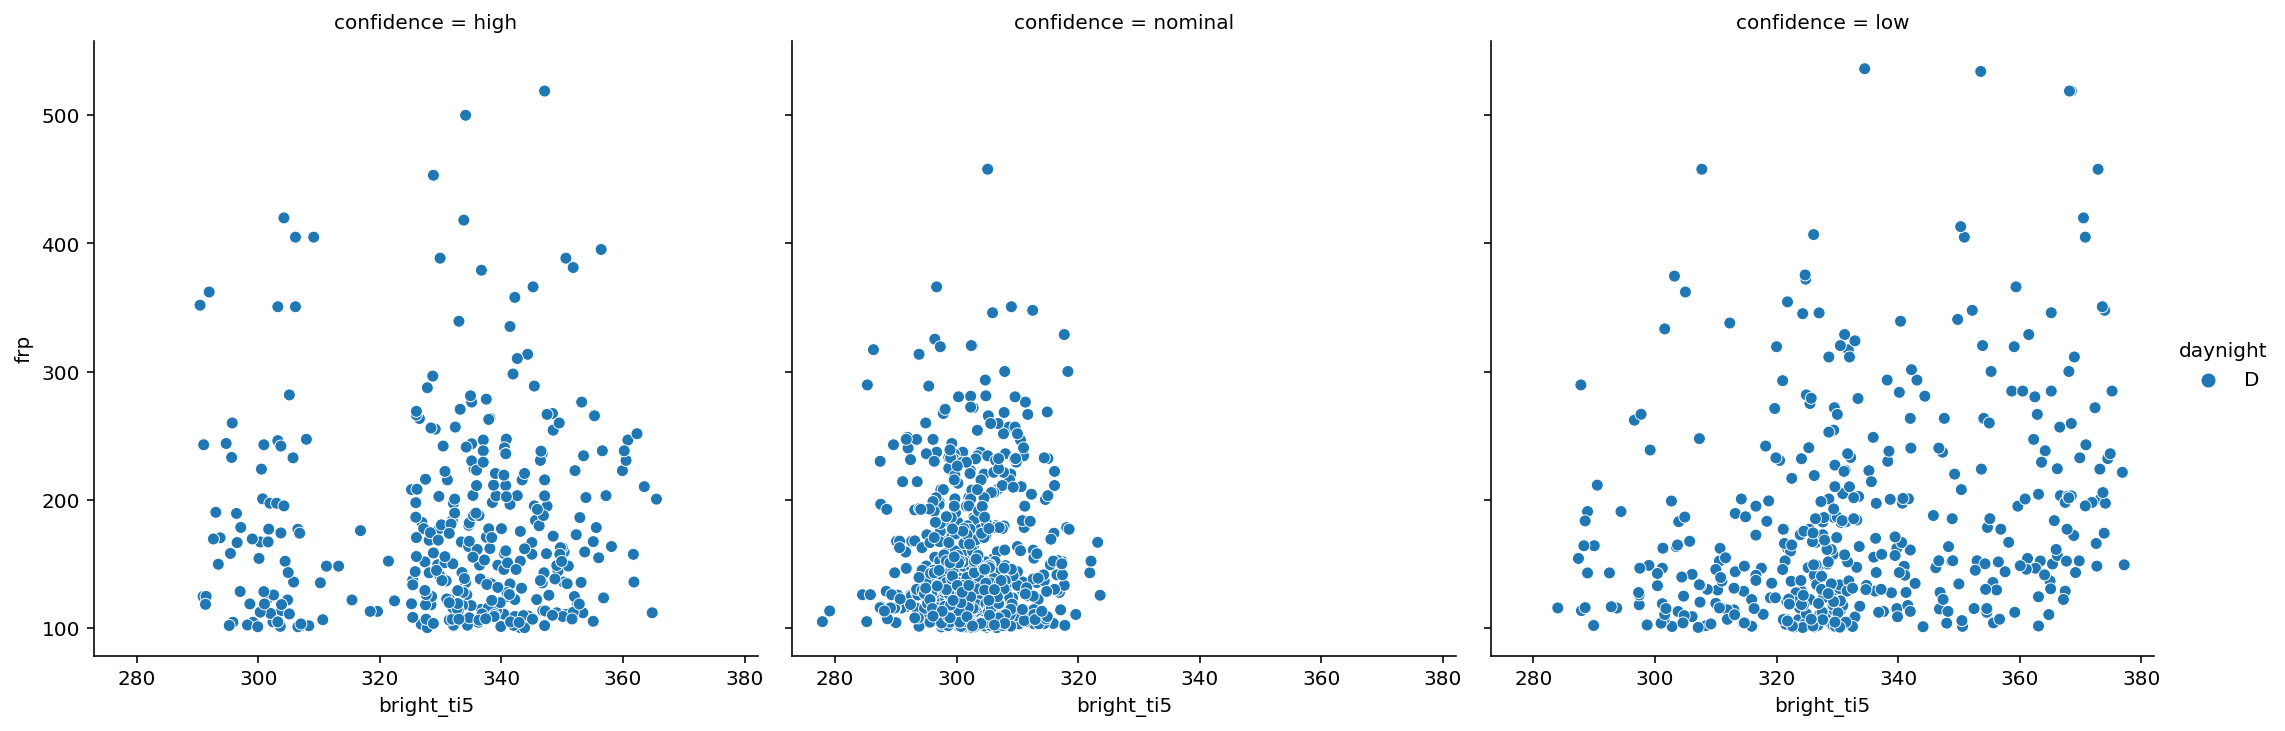

In [179]:
sns.relplot(x="bright_ti5", y="frp", hue="daynight", col = "confidence",data=df3, kind='scatter')

In [182]:
# Write animation to file
fig1 = px.scatter_geo(df3, 
                    lat='latitude', 
                    lon='longitude', 
                    scope='asia',
                    center={'lat':2.2180,'lon':115.6628}, # centered to SEA
                    color='frp',
                    animation_frame=df3['acq_date'].astype(str)) 
fig1.write_html('content/animation4.html')
# TODO: Fix animation to have constant legend 

# Display animation
#IFrame(src='content/animation4.html', width=1080, height=720)

    latitude  longitude  bright_ti4  ...   frp  daynight              period
0  -10.04099  149.90570       330.4  ...   3.5         D 2021-04-01 03:00:00
30  -3.73083  143.32101       331.2  ...   3.8         D 2021-04-01 03:00:00
29  -3.86496  143.06902       343.6  ...  14.9         D 2021-04-01 03:00:00
28  -3.97043  143.80424       334.2  ...   2.1         D 2021-04-01 03:00:00
27  -4.09359  144.71913       344.1  ...   6.0         D 2021-04-01 03:00:00

[5 rows x 14 columns] (1389, 14)
0         3.5
30        3.8
29       14.9
28        2.1
27        6.0
         ... 
57884     3.4
57878     1.7
57693     2.0
57692     2.2
58261     2.0
Name: frp, Length: 50722, dtype: float64


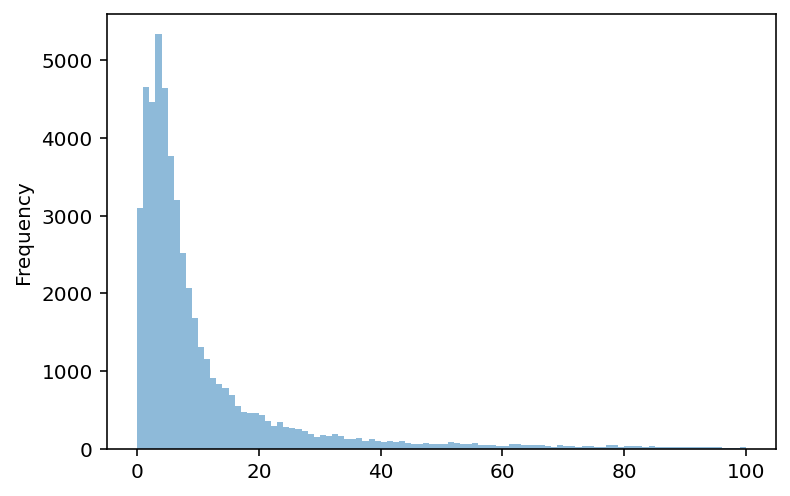

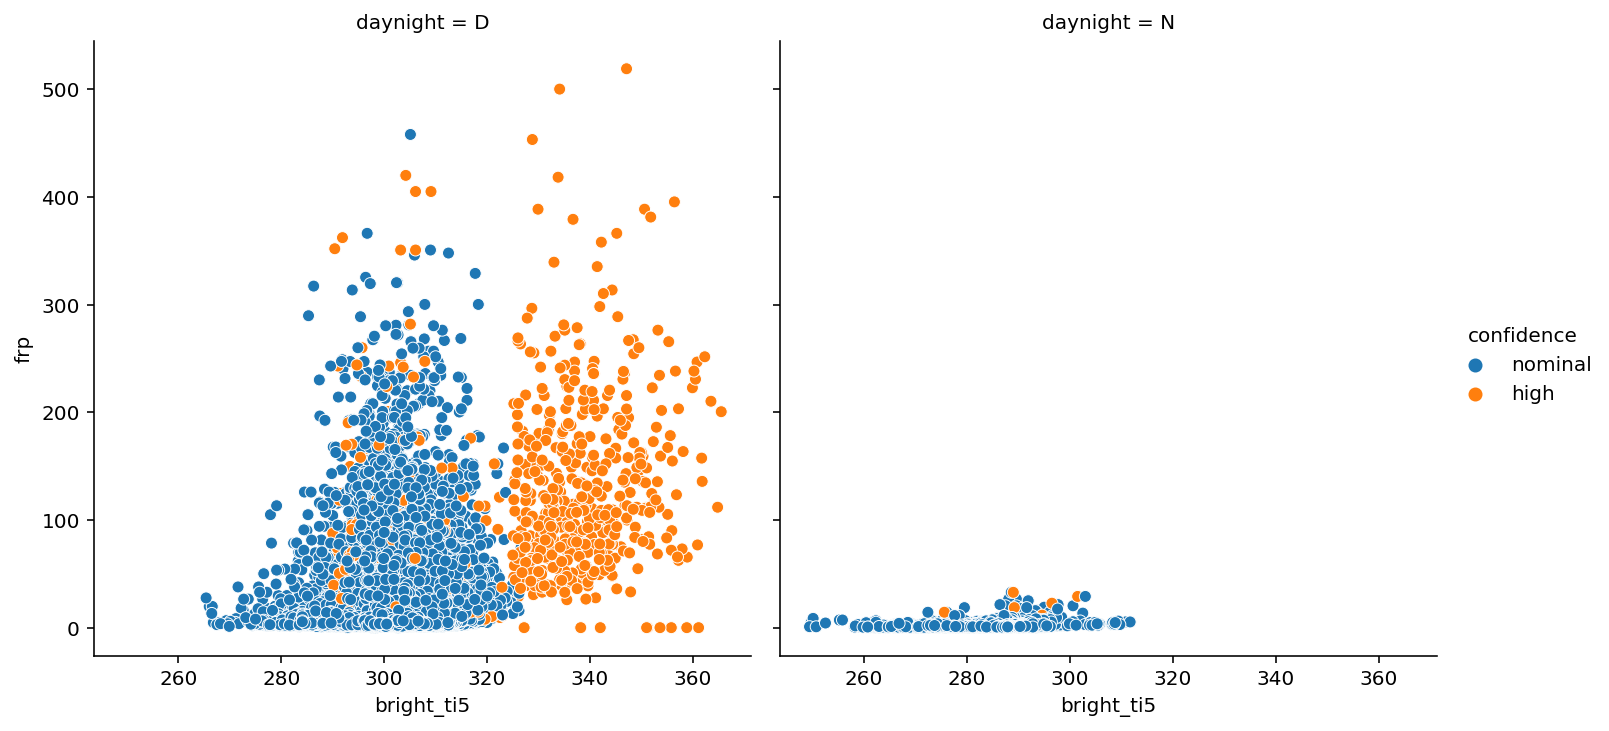

In [192]:
df2 = data[data['confidence'] != "low"]
print(df2[:5], df3.shape)


df = df2['frp']
print(df)
ax = df.plot.hist(bins=100, alpha=0.5, range=[0,100] )

sns.relplot(x="bright_ti5", y="frp", hue="confidence", col = "daynight",data=df2, kind='scatter')

# Write animation to file
fig1 = px.scatter_geo(df2, 
                    lat='latitude', 
                    lon='longitude', 
                    scope='asia',
                    center={'lat':2.2180,'lon':115.6628}, # centered to SEA
                    color='frp',
                    animation_frame=df2['acq_date'].astype(str)) 
fig1.write_html('content/animation5.html')
# TODO: Fix animation to have constant legend 

# Display animation
#IFrame(src='content/animation5.html', width=1080, height=720)

In [ ]:
## run with caution, this thing destroys my kernel

import plotly.graph_objects as go

fig = go.Figure(go.Scattergeo(
    lat=data['latitude'],
    lon=data['longitude'],
    marker=dict(color=data['frp'],
                colorscale='viridis',
                size=1)
))
fig.show()

In [195]:
# Write animation to file
fig1 = px.scatter_geo(data, 
                    lat='latitude', 
                    lon='longitude', 
                    scope='asia',
                    center={'lat':2.2180,'lon':115.6628}, # centered to SEA
                    color='bright_ti5',
                    animation_frame=data['acq_date'].astype(str)) 
fig1.write_html('content/animation6.html')

In [198]:
df8 = data[data.frp < 100]
print(df8[:5], df8.shape)

def visualization(df_input, file_name):
  df = df_input['frp']
  print(df)
  ax = df.plot.hist(bins=100, alpha=0.5 )

  sns.relplot(x="bright_ti5", y="frp", hue="daynight", col = "confidence",data=df_input, kind='scatter')
  # Write animation to file
  fig1 = px.scatter_geo(df_input, 
                      lat='latitude', 
                      lon='longitude', 
                      scope='asia',
                      center={'lat':2.2180,'lon':115.6628}, # centered to SEA
                      color='frp',
                      animation_frame=df_input['acq_date'].astype(str)) 
  fig1.write_html('content/'+file_name+'.html')

    latitude  longitude  bright_ti4  ...   frp  daynight              period
0  -10.04099  149.90570       330.4  ...   3.5         D 2021-04-01 03:00:00
30  -3.73083  143.32101       331.2  ...   3.8         D 2021-04-01 03:00:00
29  -3.86496  143.06902       343.6  ...  14.9         D 2021-04-01 03:00:00
28  -3.97043  143.80424       334.2  ...   2.1         D 2021-04-01 03:00:00
27  -4.09359  144.71913       344.1  ...   6.0         D 2021-04-01 03:00:00

[5 rows x 14 columns] (56869, 14)


0         3.5
30        3.8
29       14.9
28        2.1
27        6.0
         ... 
57884     3.4
57878     1.7
57693     2.0
57692     2.2
58261     2.0
Name: frp, Length: 56869, dtype: float64


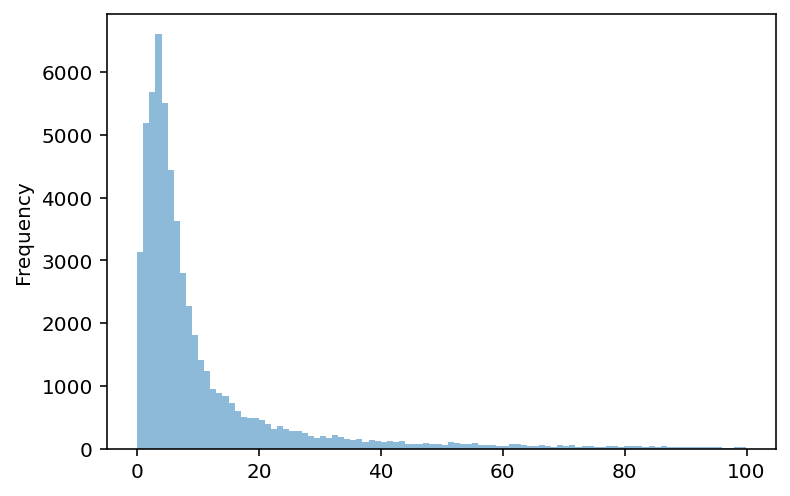

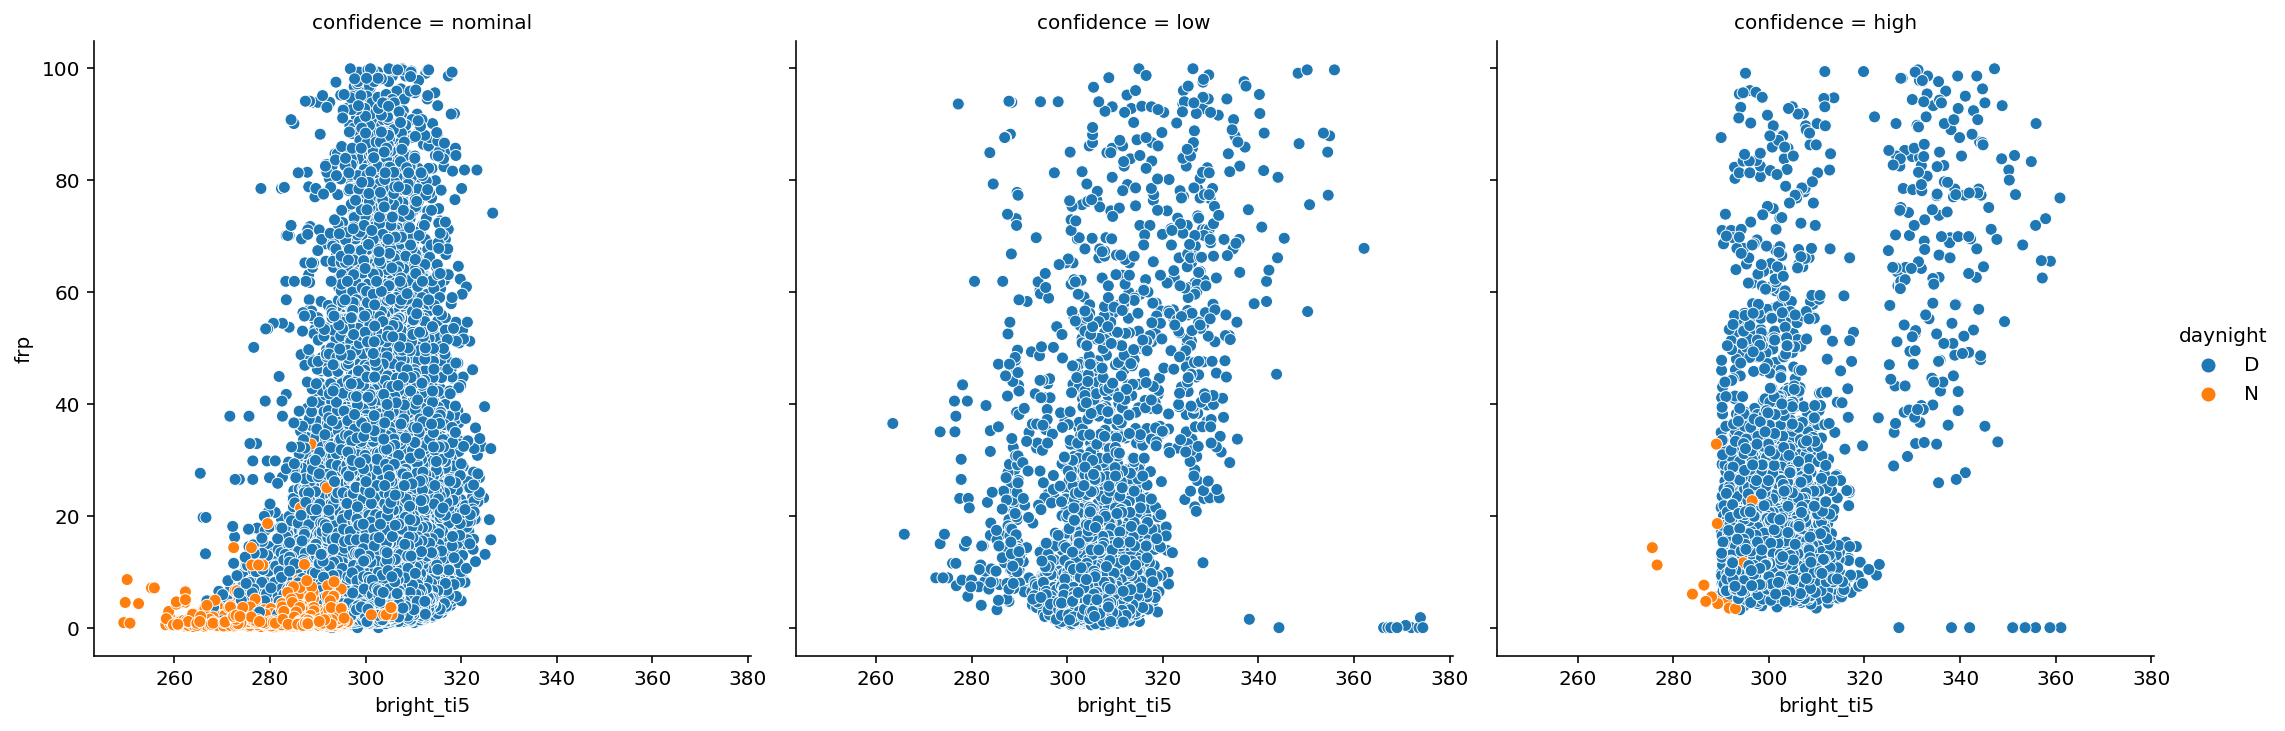

In [200]:
visualization(df8, "animation8")

##Random Forest